In [8]:
import pandas as pd

# Load the dataset
file_path = "D:\Excelr\Data Science\Data Science Assignment\EDA1\EDA1\Cardiotocographic.csv"
data = pd.read_csv(file_path)
# Display basic information
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


(None,
            LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
 0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
 1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
 2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
 3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
 4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   
 
    MLTV  Width  Tendency  NSP  
 0   2.4   64.0  0.999926  2.0  
 1  10.4  130.0  0.000000  1.0  
 2  13.4  130.0  0.000000  1.0  
 3  23.0  117.0  1.000000  1.0  
 4  19.9  117.0  1.000000  1.0  )

In [2]:
# missing values
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types

(LB          21
 AC          20
 FM           0
 UC           0
 DL           0
 DS          21
 DP          21
 ASTV         0
 MSTV         0
 ALTV         0
 MLTV        21
 Width       21
 Tendency    21
 NSP         21
 dtype: int64,
 LB          float64
 AC          float64
 FM          float64
 UC          float64
 DL          float64
 DS          float64
 DP          float64
 ASTV        float64
 MSTV        float64
 ALTV        float64
 MLTV        float64
 Width       float64
 Tendency    float64
 NSP         float64
 dtype: object)

In [3]:
# missing values with the median for each column
data_filled = data.fillna(data.median())

# missing values are handled
missing_values_after_imputation = data_filled.isnull().sum()

missing_values_after_imputation

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [4]:
# outliers using the IQR method

def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Filter out outliers
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return outliers

# To identify outliers
outliers_iqr = detect_outliers_iqr(data_filled)

# number of outliers in each column
outlier_summary = outliers_iqr.sum()

outlier_summary

LB           10
AC           43
FM          347
UC           13
DL          125
DS          120
DP          284
ASTV         10
MSTV         80
ALTV        318
MLTV         81
Width        10
Tendency     10
NSP         559
dtype: int64

In [5]:
# Capping the outliers at the IQR boundaries
def cap_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the values to the lower and upper bounds
    df_capped = df.copy()
    df_capped = df_capped.clip(lower=lower_bound, upper=upper_bound, axis=1)
    return df_capped
# capping to treat the outliers
data_capped = cap_outliers_iqr(data_filled)
# outliers are capped successfully
outliers_after_capping = detect_outliers_iqr(data_capped).sum()

outliers_after_capping

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [6]:
# statistical summary
stat_summary = data_capped.describe().T
# Add the median and IQR to the summary
stat_summary['median'] = data_capped.median()
stat_summary['IQR'] = data_capped.quantile(0.75) - data_capped.quantile(0.25)
# Display the summary
stat_summary

,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,2126.0,133.290331,9.930268,105.000000,126.000000,133.000000,140.000000,161.000000,133.000000,14.000000
AC,2126.0,0.003132,0.003828,-0.008409,0.000000,0.001634,0.005606,0.014015,0.001634,0.005606
FM,2126.0,0.001568,0.002485,-0.003850,0.000000,0.000000,0.002567,0.006416,0.000000,0.002567
UC,2126.0,0.004362,0.003001,-0.005177,0.001851,0.004484,0.006536,0.013564,0.004484,0.004685
DL,2126.0,0.001770,0.002668,-0.004934,0.000000,0.000000,0.003289,0.008224,0.000000,0.003289
DS,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,2126.0,46.981873,17.612745,-11.500000,32.000000,49.000000,61.000000,104.500000,49.000000,29.000000
MSTV,2126.0,1.304644,0.781091,-0.800000,0.700000,1.200000,1.700000,3.200000,1.200000,1.000000
ALTV,2126.0,6.691678,10.378400,-16.500000,0.000000,0.000000,11.000000,27.500000,0.000000,11.000000


<Figure size 1500x1000 with 0 Axes>

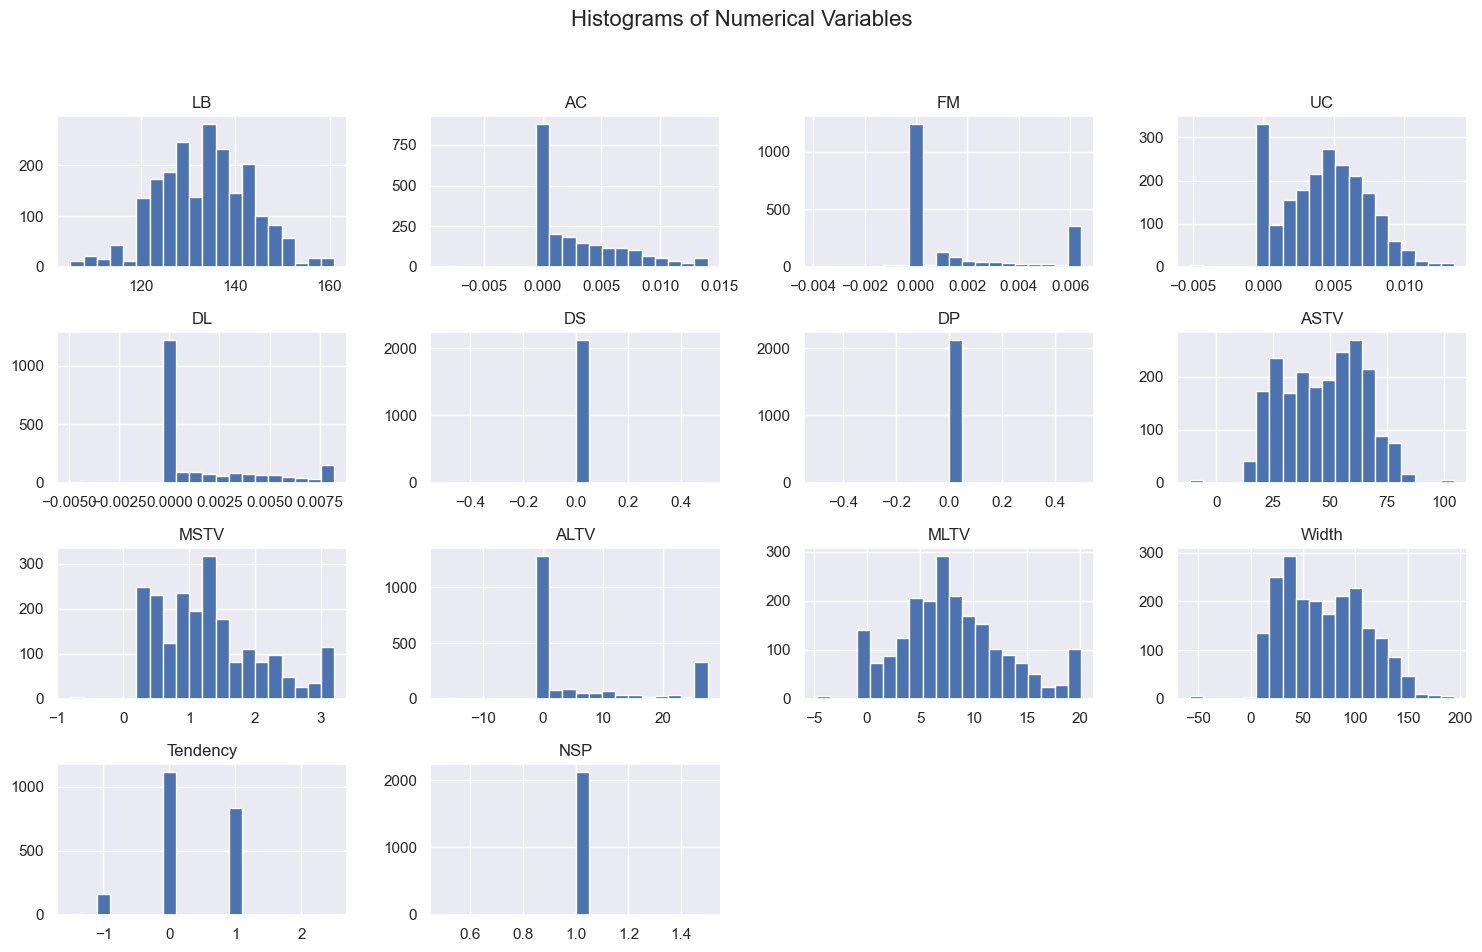

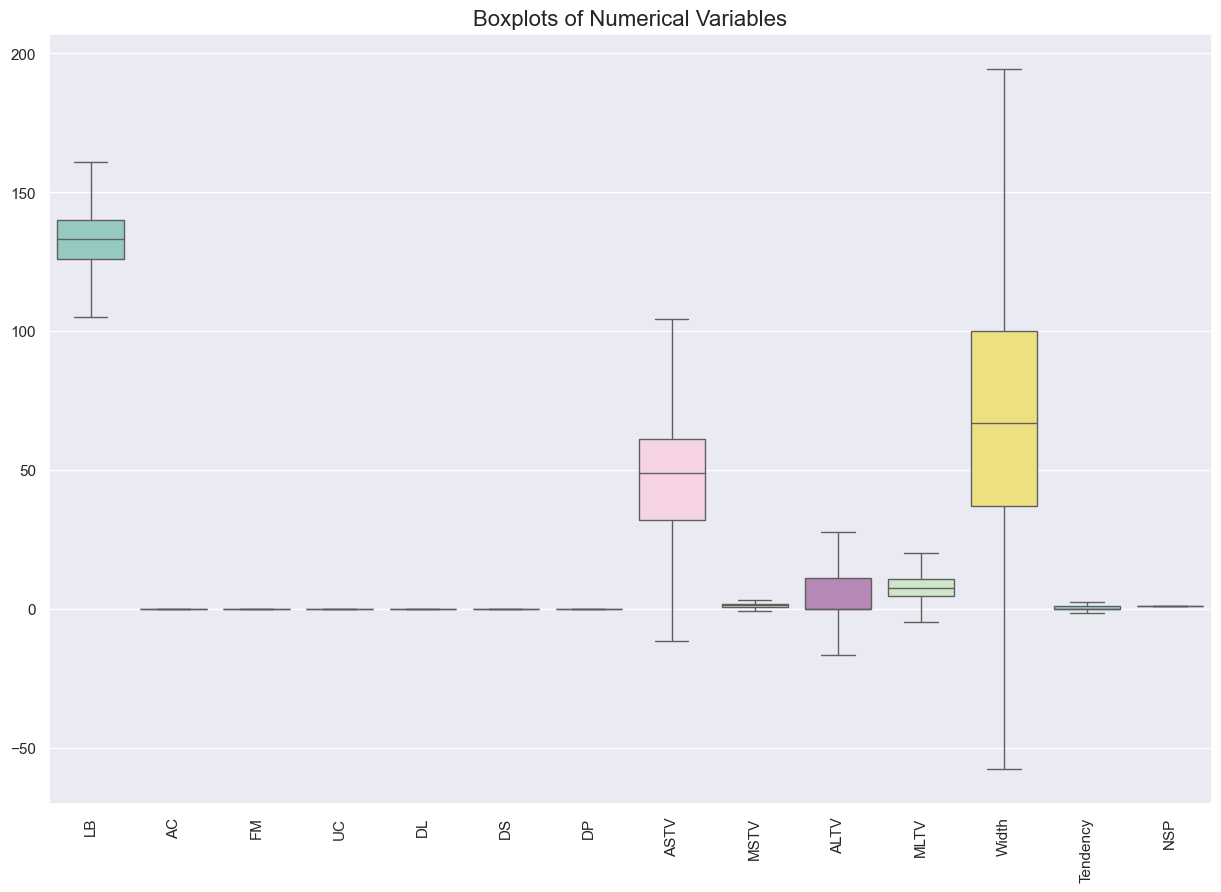

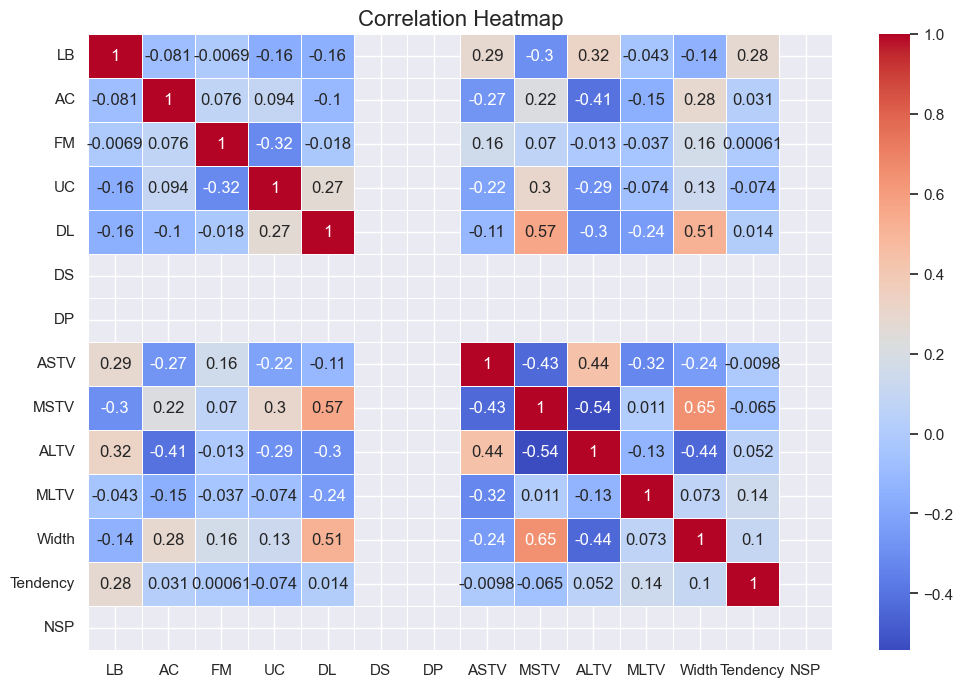

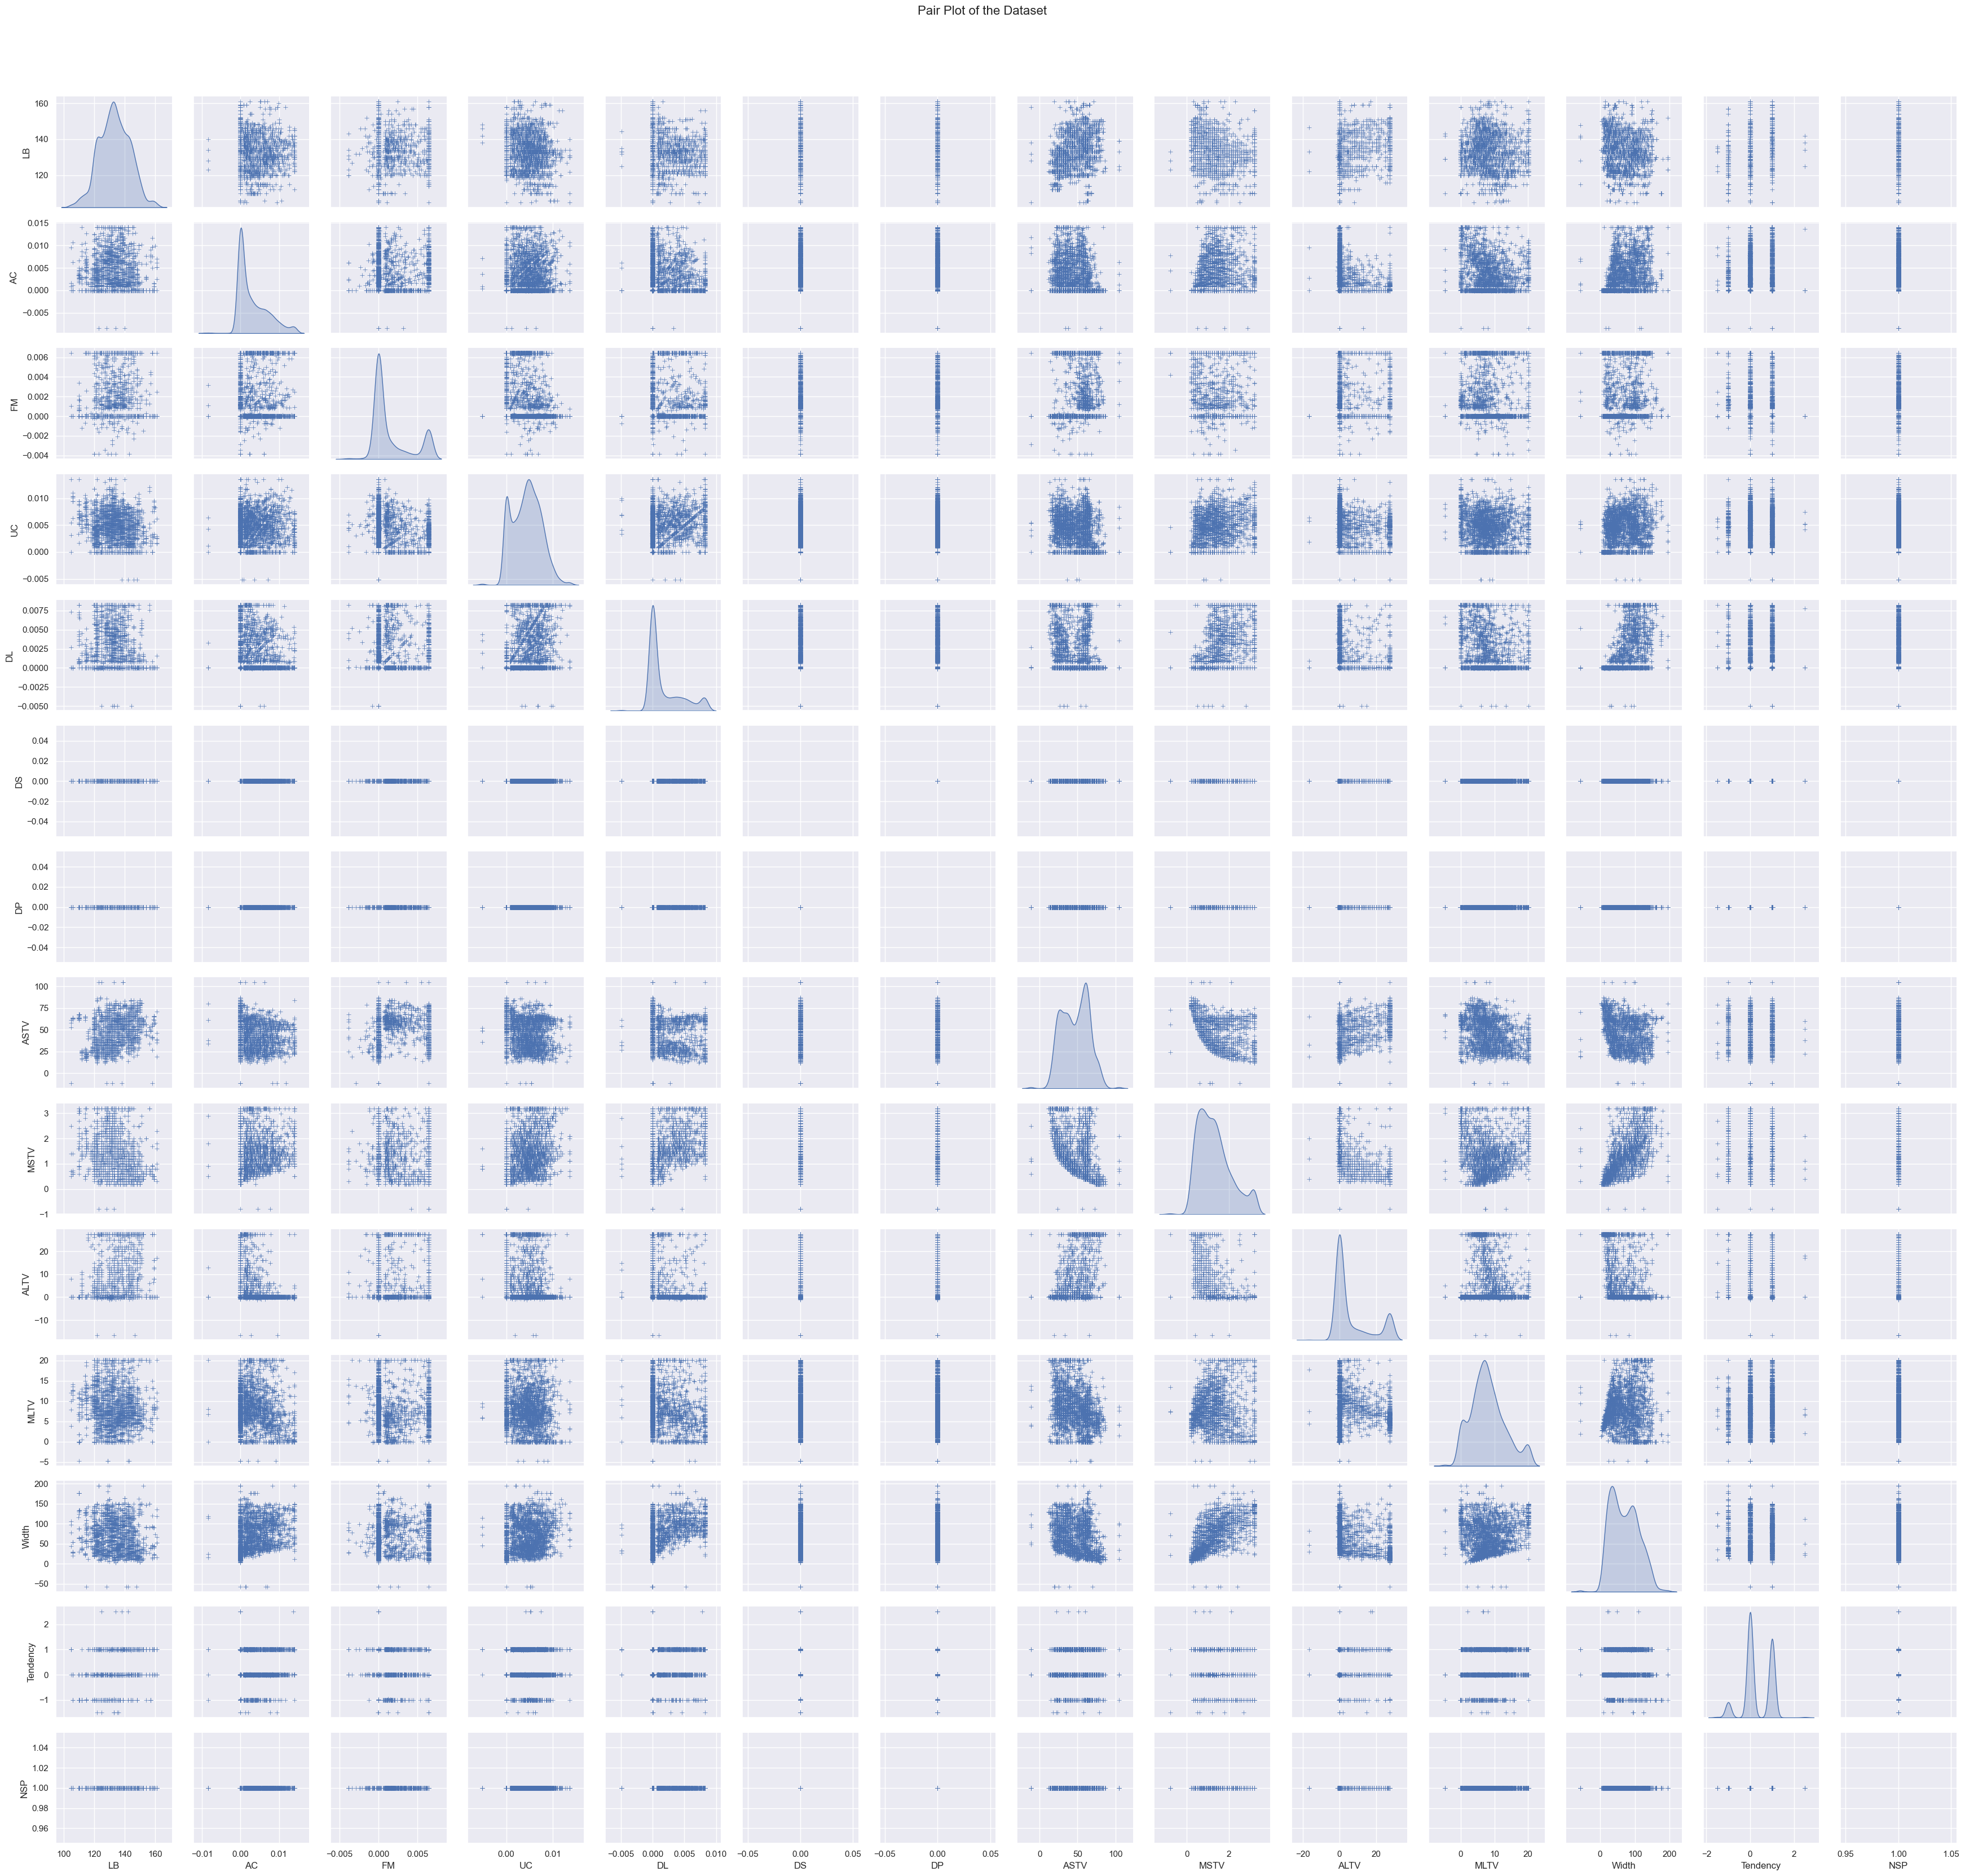

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn's default style
sns.set_theme()

plt.figure(figsize=(15, 10))

# 1. Histograms for numerical variables
data_capped.hist(bins=20, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 2. Boxplots for numerical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_capped, palette="Set3")
plt.title('Boxplots of Numerical Variables', fontsize=16)
plt.xticks(rotation=90)
plt.show()

# 3. Correlation heatmap to explore relationships between variables
plt.figure(figsize=(12, 8))
correlation_matrix = data_capped.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# 4. Pair plot for deeper insights into relationships
sns.pairplot(data_capped, diag_kind='kde', markers='+')
plt.suptitle('Pair Plot of the Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()